In this example, we are trying to estimate a firm's profit by considering its spending on Research and Development, Administration, Marketing, and the state in which it is located.

Importing Libraries

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importing the data from a csv file into a pandas dataframe

In [83]:
businesses = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/1000_Companies.csv')

Taking a peek at the dataset

In [84]:
businesses.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We will now generate a correlation matrix 


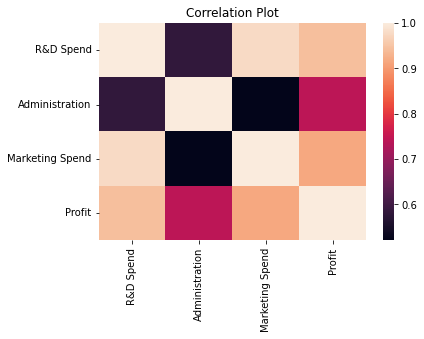

In [85]:
#pandas has a .corr() method which returns a correlation matrix
#we will pass the correlation matrix to a seaborn heatmap method to generate the graphic

sns.heatmap(businesses.corr())
plt.title('Correlation Plot')
plt.show()

Let's take another look at our data. The state column cannot be used in our linear regression model. Hence, we need to do one-hot encoding.

In [86]:
businesses.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


What features do we have in our dataset?

In [87]:
#Curious about what the columns in the dataset are?
#Use .columns 

businesses.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Encoding the values in the states column

How much data do we have?

In [88]:
#Check the number of rows and columns - we have 301 records with 9 attributes
businesses.shape

(1000, 5)

What data types do we have?





In [89]:
#Let's learn some more about the dataset 
#The object data types are categorical data
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


Do we have any missing values?

In [90]:
#Checking the number of missing values
# isnull() - tells you the number of missing values per column
businesses.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [91]:
states_encoded = pd.get_dummies(businesses['State'])

Taking a look the encoding

In [92]:
states_encoded

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [93]:
businesses = businesses.drop(['State'], axis = 1)

Verifying that the state column has been dropped

In [94]:
businesses

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


Assigning the profit column (targets) to 'y'

In [95]:
y = businesses['Profit'].values

Removing the profit column since we have assigned it to 'y'

In [96]:
businesses = businesses.drop(['Profit'], axis = 1)

Concatenating the encoded values to the dataframe

In [97]:
businesses = pd.concat([businesses, states_encoded], axis=1)

The dataframe with the encoded values. We will use these features to estimate the profit. 

In [98]:
businesses

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.800,471784.1000,0,0,1
1,162597.70,151377.590,443898.5300,1,0,0
2,153441.51,101145.550,407934.5400,0,1,0
3,144372.41,118671.850,383199.6200,0,0,1
4,142107.34,91391.770,366168.4200,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0,0
996,134970.00,130390.080,329204.0228,1,0,0
997,100275.47,241926.310,227142.8200,1,0,0
998,128456.23,321652.140,281692.3200,1,0,0


Assigning the features to X

In [99]:
X = businesses.values

Splitting the dataset into training and test sets in the ratio 70/30

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

Creating the model and fitting (training) on the training data

In [101]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Making Predictions on the test data

In [102]:
y_pred = LR.predict(X_test)

Calculating the coefficients





In [103]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 4.98739072e-01  1.15653859e+00  1.01462440e-01 -1.70623211e+02
 -3.23441636e+02  4.94064847e+02]


Calculating the intercept

In [104]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -86353.5365673207


Calculating R Squared

In [105]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.9649339659468821


Calculating Mean Squared Error

In [106]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 52964674.492728256


Calculating Root Mean Squared Error

In [107]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 7277.683319074021


Calculating Mean Absolute Error

In [108]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 1804.2045412125174
